## Import Required Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import gym
import gym_donkeycar
from gym import spaces
import sys
import os

# Add current directory to path
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Import flipper wrapper
from core_code.env_flipper import HorizontalFlippingWrapper

## Test Donkeycar Environment Flipping

### Environment Creation

In [2]:
def create_donkeycar_env(env_id="donkey-waveshare-v0"):
    """
    Create a donkeycar environment for testing
    
    Args:
        env_id: Environment ID (default: donkey-waveshare-v0)
        
    Returns:
        Donkeycar gym environment
    """
    try:
        # Create the donkeycar environment
        env = gym.make(env_id)
            
        print(f"✅ Created donkeycar environment: {env_id}")
        print(f"   Observation space: {env.observation_space}")
        print(f"   Action space: {env.action_space}")
      
        return env
        
    except Exception as e:
        print(f"❌ Failed to create donkeycar environment: {e}")
        raise

### Observation Flipping

In [3]:
orig_env = create_donkeycar_env()

INFO:gym_donkeycar.core.client:connecting to localhost:9091 
/opt/anaconda3/envs/donkey_2/lib/python3.11/site-packages/gym/spaces/box.py:78: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:sim started!


starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 8.0
Setting default: frame_skip 1
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
Setting default: steer_limit 1.0
Setting default: throttle_min 0.0
Setting default: throttle_max 1.0
✅ Created donkeycar environment: donkey-waveshare-v0
   Observation space: Box(0, 255, (120, 160, 3), uint8)
   Action space: Box([-1.  0.], 1.0, (2,), float32)


Exception in thread Thread-4 (proc_msg):
Traceback (most recent call last):
  File "/opt/anaconda3/envs/donkey_2/lib/python3.11/site-packages/gym_donkeycar/core/client.py", line 101, in proc_msg
    data = s.recv(1024 * 256)
           ^^^^^^^^^^^^^^^^^^
ConnectionResetError: [Errno 54] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/donkey_2/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/envs/donkey_2/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/opt/anaconda3/envs/donkey_2/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/donkey_2/lib/python3.11/site-packages/gym_donkeycar/core/client.py", line 153, in proc_msg
    self.on_msg_recv({"msg_type": "aborted"})
  File "/opt/anaconda3/envs

Exception: [Errno 54] Connection reset by peer


In [4]:
flipped_env = HorizontalFlippingWrapper(orig_env, hflip_prob=1.0)

🔄🔄🔄🔄🔄 CALLFLOW: Entering env_flipper.py - Horizontal Flipping Gym Wrapper 🔄🔄🔄🔄🔄


In [5]:
orig_obs = orig_env.reset()

In [6]:
flipped_obs = flipped_env.reset()

In [7]:
print(f"Original observation shape: {orig_obs.shape}")
print(f"Flipped observation shape: {flipped_obs.shape}")
print(f"Observation dtype: {orig_obs.dtype}, {flipped_obs.dtype}")

Original observation shape: (120, 160, 3)
Flipped observation shape: (120, 160, 3)
Observation dtype: uint8, uint8


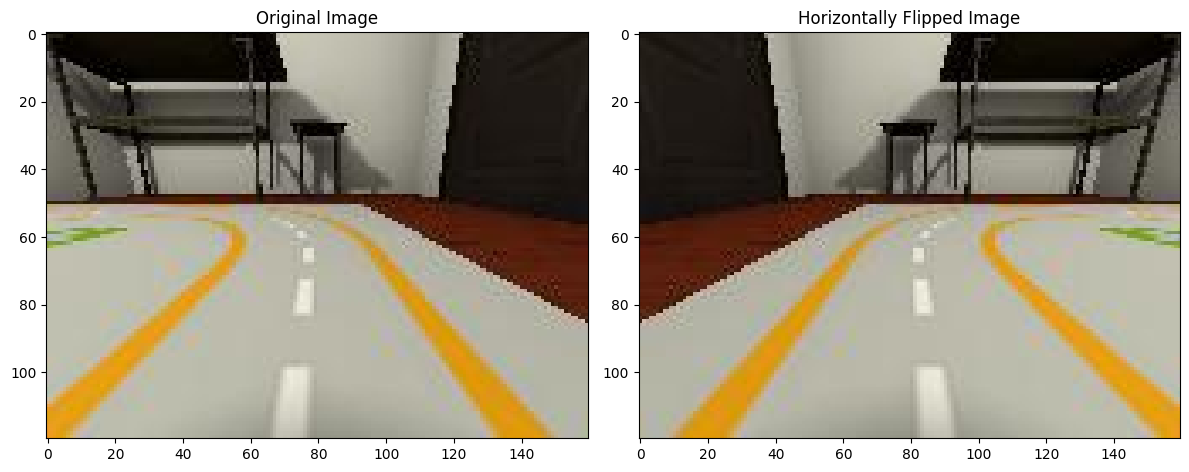

In [8]:
# Display both images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(orig_obs)
axes[1].imshow(flipped_obs)

axes[0].set_title('Original Image')
axes[0].axis('on')

axes[1].set_title('Horizontally Flipped Image')
axes[1].axis('on')

plt.tight_layout()
plt.show()

### Action Flipping

In [9]:
wrapped_env = HorizontalFlippingWrapper(create_donkeycar_env(), hflip_prob=1.0)
    
test_actions = [
    np.array([0.5, 0.7]),    # Right turn
    np.array([-0.3, 0.4]),   # Left turn
    np.array([0.0, 0.8]),    # Straight
    np.array([1.0, 0.0]),    # Max right
    np.array([-1.0, 1.0]),   # Max left
    ]
    
print("🔍 Testing steering action flipping...")
print("=" * 60)
    
for i, action in enumerate(test_actions):
    # Test the internal flip method
    flipped_action = wrapped_env._flip_action(action)
        
    print(f"Test {i+1}:")
    print(f"  Original:  [steering={action[0]:+.1f}, throttle={action[1]:.1f}]")
    print(f"  Flipped:   [steering={flipped_action[0]:+.1f}, throttle={flipped_action[1]:.1f}]")

INFO:gym_donkeycar.core.client:connecting to localhost:9091 
INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.


starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 8.0
Setting default: frame_skip 1
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
Setting default: steer_limit 1.0
Setting default: throttle_min 0.0
Setting default: throttle_max 1.0


INFO:gym_donkeycar.envs.donkey_sim:sim started!


✅ Created donkeycar environment: donkey-waveshare-v0
   Observation space: Box(0, 255, (120, 160, 3), uint8)
   Action space: Box([-1.  0.], 1.0, (2,), float32)
🔄🔄🔄🔄🔄 CALLFLOW: Entering env_flipper.py - Horizontal Flipping Gym Wrapper 🔄🔄🔄🔄🔄
🔍 Testing steering action flipping...
Test 1:
  Original:  [steering=+0.5, throttle=0.7]
  Flipped:   [steering=-0.5, throttle=0.7]
Test 2:
  Original:  [steering=-0.3, throttle=0.4]
  Flipped:   [steering=+0.3, throttle=0.4]
Test 3:
  Original:  [steering=+0.0, throttle=0.8]
  Flipped:   [steering=-0.0, throttle=0.8]
Test 4:
  Original:  [steering=+1.0, throttle=0.0]
  Flipped:   [steering=-1.0, throttle=0.0]
Test 5:
  Original:  [steering=-1.0, throttle=1.0]
  Flipped:   [steering=+1.0, throttle=1.0]


In [10]:
wrapped_env.close()
del wrapped_env

### Testing Flipping Probability

In [11]:
# Test different flip probabilities
flip_probs = [0.0, 0.5, 1.0]
    
for prob in flip_probs:
    print(f"\n📊 Testing with flip_prob = {prob}")
        
    flip_count = 0
    n_tests = 10
    
    try:
        env = HorizontalFlippingWrapper(create_donkeycar_env(), hflip_prob=prob)   
        
        for i in range(n_tests):         
            env.reset()
            # Check the correct attribute name
            if hasattr(env, '_episode_flipped') and env._episode_flipped:
                flip_count += 1 
                
        actual_flip_rate = flip_count / n_tests
        print(f"   Expected flip rate: {prob:.1%}")
        print(f"   Actual flip rate:   {actual_flip_rate:.1%}")
        print(f"   Episodes flipped:   {flip_count}/{n_tests}")
        print('=' * 40)
        
    except Exception as e:
        print(f"   ❌ Error testing flip_prob {prob}: {e}")
        
    finally:
        try:
            env.close()
        except:
            pass

INFO:gym_donkeycar.core.client:connecting to localhost:9091 
INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.



📊 Testing with flip_prob = 0.0
starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 8.0
Setting default: frame_skip 1
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
Setting default: steer_limit 1.0
Setting default: throttle_min 0.0
Setting default: throttle_max 1.0


INFO:gym_donkeycar.envs.donkey_sim:sim started!


✅ Created donkeycar environment: donkey-waveshare-v0
   Observation space: Box(0, 255, (120, 160, 3), uint8)
   Action space: Box([-1.  0.], 1.0, (2,), float32)
🔄🔄🔄🔄🔄 CALLFLOW: Entering env_flipper.py - Horizontal Flipping Gym Wrapper 🔄🔄🔄🔄🔄


INFO:gym_donkeycar.core.client:connecting to localhost:9091 
INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:sim started!


   Expected flip rate: 0.0%
   Actual flip rate:   0.0%
   Episodes flipped:   0/10

📊 Testing with flip_prob = 0.5
starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 8.0
Setting default: frame_skip 1
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
Setting default: steer_limit 1.0
Setting default: throttle_min 0.0
Setting default: throttle_max 1.0
✅ Created donkeycar environment: donkey-waveshare-v0
   Observation space: Box(0, 255, (120, 160, 3), uint8)
   Action space: Box([-1.  0.], 1.0, (2,), float32)
🔄🔄🔄🔄🔄 CALLFLOW: Entering env_flipper.py - Horizontal Flipping Gym Wrapper 🔄🔄🔄🔄🔄


INFO:gym_donkeycar.core.client:connecting to localhost:9091 
INFO:gym_donkeycar.envs.donkey_sim:on need car config
INFO:gym_donkeycar.envs.donkey_sim:sending car config.
INFO:gym_donkeycar.envs.donkey_sim:sim started!


   Expected flip rate: 50.0%
   Actual flip rate:   50.0%
   Episodes flipped:   5/10

📊 Testing with flip_prob = 1.0
starting DonkeyGym env
Setting default: start_delay 5.0
Setting default: max_cte 8.0
Setting default: frame_skip 1
Setting default: cam_resolution (120, 160, 3)
Setting default: log_level 20
Setting default: host localhost
Setting default: port 9091
Setting default: steer_limit 1.0
Setting default: throttle_min 0.0
Setting default: throttle_max 1.0
✅ Created donkeycar environment: donkey-waveshare-v0
   Observation space: Box(0, 255, (120, 160, 3), uint8)
   Action space: Box([-1.  0.], 1.0, (2,), float32)
🔄🔄🔄🔄🔄 CALLFLOW: Entering env_flipper.py - Horizontal Flipping Gym Wrapper 🔄🔄🔄🔄🔄
   Expected flip rate: 100.0%
   Actual flip rate:   100.0%
   Episodes flipped:   10/10
